## 4.4 범주형 독립변수

이 절에서는 범주형 독립변수를 가지는 경우의 회귀분석모형을 공부한다.

### 범주형 변수가 하나인 경우

$x_1, x_2, \ldots, x_D$라는 $D$개의 독립변수를 가지는 선형회귀모형을 생각하자.

$$ \hat{y} = w_0 + w_1x_1 + w_2x_2 + \cdots + w_Dx_D $$

여기에서 $x_1$이라는 독립변수만 범주형 변수이고 'A'과 'B'라는 두 가지의 범주값을 가질 수 있다고 하자. 

가장 간단한 방법은 전체 데이터를 $x_1=A$인 데이터와 $x_2=B$인 데이터 두 그룹으로 나누어 각각의 데이터에 대한 선형회귀모형을 만드는 것이다. 즉 다음과 같은 2개의 선형회귀모형을 만든다.


$$ 
\text{model A}:\;\; \hat{y} = w_{A,0} \; + w_{A,2}x_2 + \cdots + w_{A,D}x_D \;\; (\text{if } x_1 = A) 
$$

$$ 
\text{model B}:\;\; \hat{y} = w_{B,0} \; + w_{B,2}x_2 + \cdots + w_{B,D}x_D \;\; (\text{if } x_1 = B) 
$$


그런데 올바른 선형회귀모형에서는 $x_1$이 아닌 다른 변수 예를 들어 $x_2$의 값이 변할 때 $y$값이 변화하는 정도, 즉 가중치 $w_2$는 $x_1$의 값이 A이든 B든 같아야 한다. 하지만 위와 같은 두 개의 선형회귀모형을 만들면 $w_2$의 값이 $w_{A,2}$와 $w_{B,2}$라는 두 가지의 다른 값이 나오므로 위 모형은 적당하지 않다.

더미변수 방법은 범주형 변수 $x_1$을 $d_{1A}, d_{1B}$라는 두 개의 더미변수로 바꾸는 것이다. 더미변수는 상수항을 포함하기 때문에 더미변수로 변환하면 상수항은 없어진다. 

$$
\begin{aligned}
\hat{y} &= w_0 && + && \hspace{1cm} w_1 x_1          & +  w_2 x_2  + \cdots  + w_D x_D \\
        &      &&   && \hspace{1.2cm} \downarrow       &     \\
\hat{y} &=     &&   && w_{1A} d_{1A} + w_{1B} d_{1B} & +  w_2 x_2  + \cdots  + w_D x_D \\
\end{aligned}
$$

더미변수가 2개인 이유는 더미변수가 가질 수 있는 범주값이 2개이기 때문이다. 범주값이 $K$개이면 범주형 변수 $x_1$을 $d_{11}, \ldots, d_{1K}$라는 $K$개의 더미변수로 바꾸어야 한다.

### 풀랭크 방식

**풀랭크(full-rank) 방식에서는 더미변수의 값을 원핫인코딩(one-hot-encoding) 방식으로 지정한다.** 즉 범주값이 2가지인 경우에는 

$$
\begin{aligned}
x_1=A \;\;&\rightarrow\;\;  d_{1A}=1,\, d_{1B} = 0 \\
x_1=B \;\;&\rightarrow\;\;  d_{1A}=0,\, d_{1B} = 1 \\
\end{aligned}
$$

이 된다. 이 값을 대입하면 더미변수의 가중치는 상수항이 된다.

$$
\begin{aligned}
x_1=A \;\;&\rightarrow\;\;  \hat{y} = w_{1A} + w_2 x_2  + \cdots  + w_D x_D \\
x_1=B \;\;&\rightarrow\;\;  \hat{y} = w_{1B} + w_2 x_2  + \cdots  + w_D x_D \\
\end{aligned}
$$

위 수식은 $x_1=A$인 데이터에 대해서는 $\hat{y} = w_{1A} + w_2 x_2  + \cdots  + w_D x_D$ 모형을 사용하고 
$x_1=B$인 데이터에 대해서는 $\hat{y} = w_{1B} + w_2 x_2  + \cdots  + w_D x_D$ 모형을 사용하게 된다는 뜻이다.
이렇게 하면 범주값이 달라졌을 때 상수항만 달라지고 다른 독립변수의 가중치(영향)는 같은 모형이 된다.

In [1]:
%load_ext tikzmagic

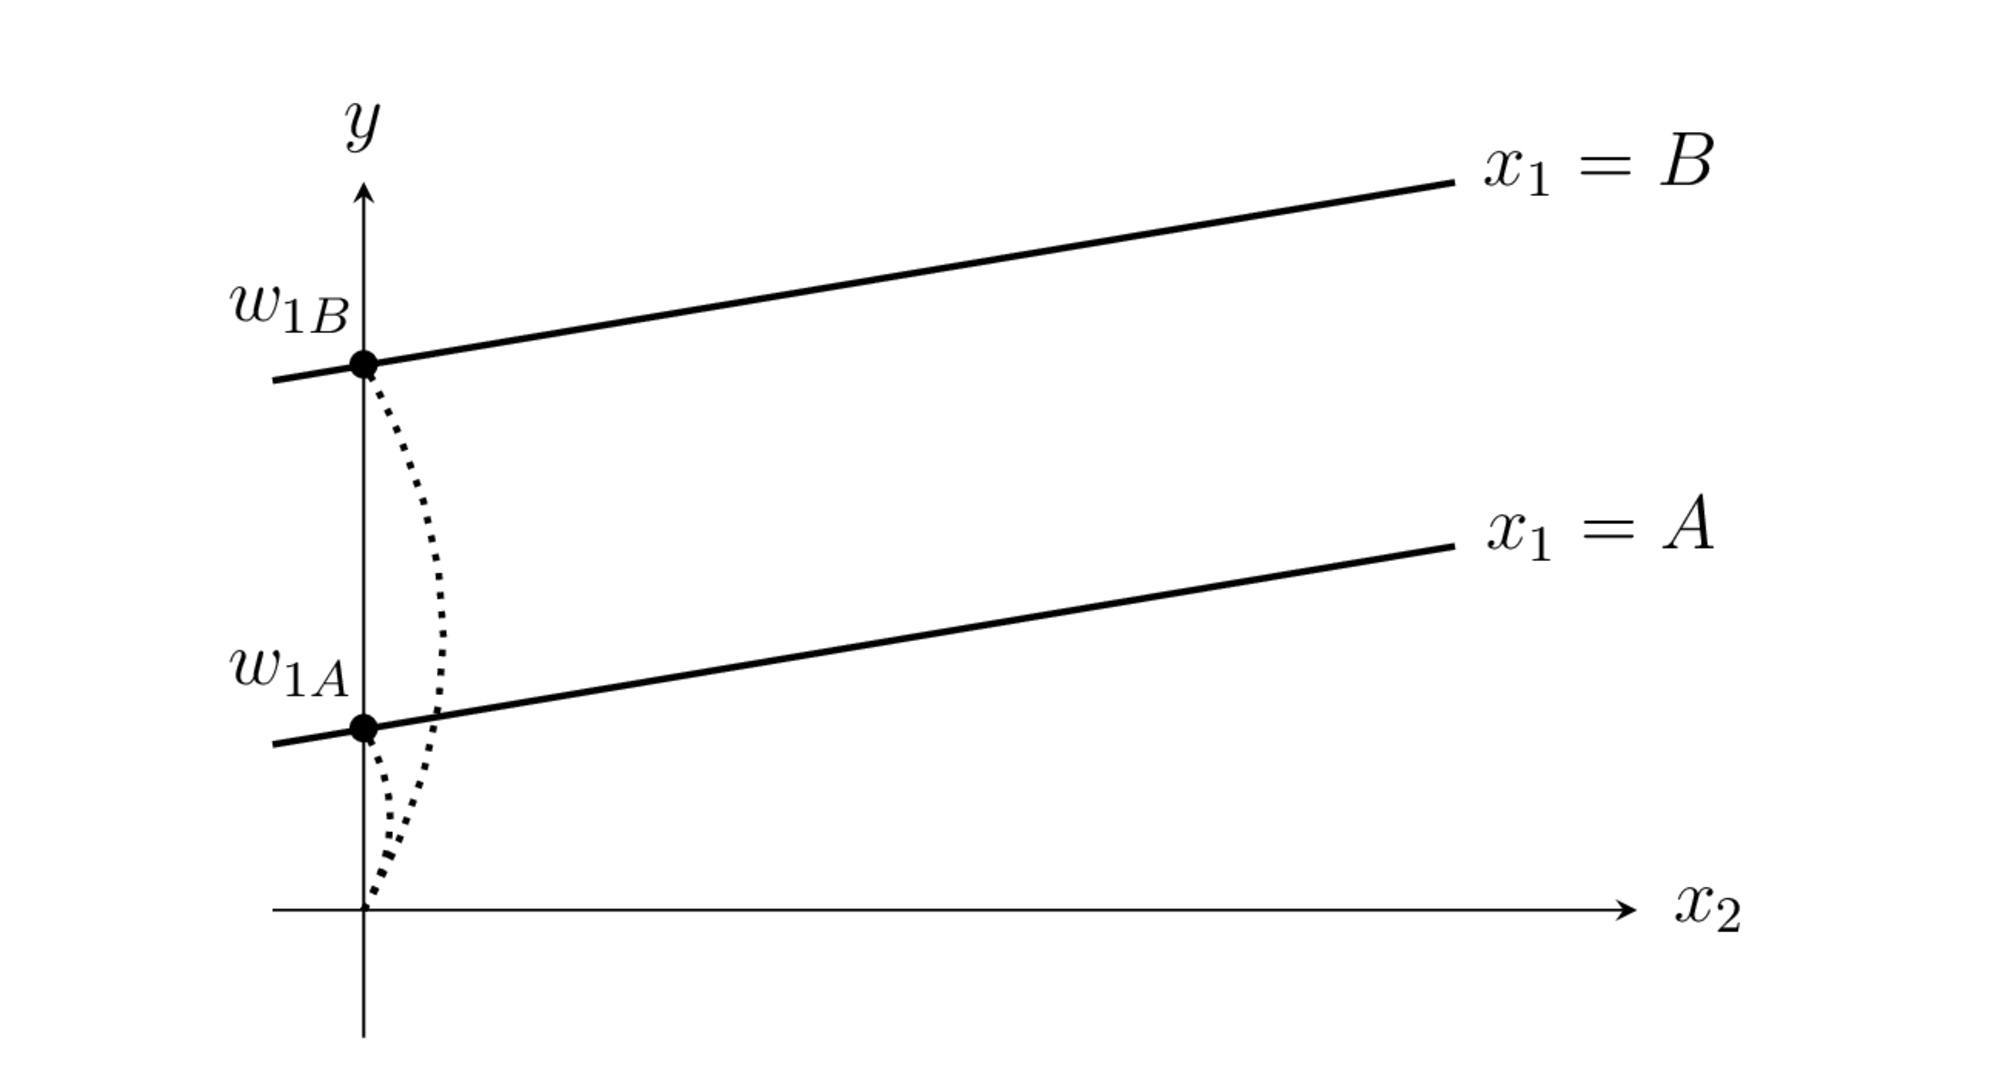

In [2]:
%%tikz -p kotex,pgfplots -l arrows.meta,calc -s 2000,1200 -f png

\coordinate (leftbottom) at (1,0);
\coordinate (righttop) at (12,6);
\fill[white,use as bounding box] (leftbottom) rectangle (righttop);
\draw[help lines, white] (leftbottom) grid (righttop);
\tikzset{
    >=stealth,font={\ttfamily\large}
}

\node (origin) at (3,1) {};
\draw[->] (3,0.3)--(3,5);
\node at (3,5.3) {$y$};
\draw[->] (2.5,1)--(10,1);
\node at (10.4,1) {$x_2$};
\draw[line width=1pt] (2.5,1.91)--(9,3);
\node at (9.8,3.1) {$x_1=A$};
\node(w1A) at (3,2) {};
\draw[fill] (w1A) circle (2pt);
\node at (2.6,2.3) {$w_{1A}$};
\draw[line width=1pt] (2.5,3.91)--(9,5);
\node at (9.8,5.1) {$x_1=B$};
\node(w1B) at (3,4) {};
\draw[fill] (w1B) circle (2pt);
\node at (2.6,4.3) {$w_{1B}$};
\draw[dotted, line width=1pt] (origin.center) edge[bend right] (w1A.center);
\draw[dotted, line width=1pt] (origin.center) edge[bend right] (w1B.center);

그림 : 풀랭크 방식 더미변수 가중치의 의미

선형회귀모형에 범주형 독립변수가 있으면 더미변수의 가중치 이외에 별도의 상수항이 있으면 안된다. 만약 위의 모형에서 별도의 상수항 $w_0$이 존재한다면 모형은 다음처럼 될 것이다.

$$
\begin{aligned}
x_1=A \;\;&\rightarrow\;\;  \hat{y} = (w_0 + w_{1A}) + w_2 x_2  + \cdots  + w_D x_D \\
x_1=B \;\;&\rightarrow\;\;  \hat{y} = (w_0 + w_{1B}) + w_2 x_2  + \cdots  + w_D x_D \\
\end{aligned}
$$

이 경우에는 $w_0 + w_{1A}$나 $w_0 + w_{1B}$의 값은 구할 수 있어도  $w_0$ 값과 $w_{1A}$ 값을 분리할 수는 없다. **범주형 독립변수가 있으면 상수항은 포함시키지 않는다.**

### 축소랭크 방식

**축소랭크(reduced-rank) 방식에서는 특정한 하나의 범주값을 기준값(reference, baseline)으로 하고 기준값에 대응하는 더미변수의 가중치는 항상 1으로 놓는다.** 다른 범주형 값을 가지는 경우는 기준값에 추가적인 특성이 있는 것으로 간주한다. 예를 들어 다음 축소랭크 방식은 $x_1=A$를 기준값으로 하는 경우이다.

$$
\begin{aligned}
x_1=A \;\;&\rightarrow\;\;  d_{1A}=1,\, d_{1B} = 0 \\
x_1=B \;\;&\rightarrow\;\;  d_{1A}=1,\, d_{1B} = 1 \\
\end{aligned}
$$

반대로 $x_1=B$를 기준값으로 하면 다음과 같아진다.

$$
\begin{aligned}
x_1=A \;\;&\rightarrow\;\;  d_{1A}=1,\, d_{1B} = 1 \\
x_1=B \;\;&\rightarrow\;\;  d_{1A}=0,\, d_{1B} = 1 \\
\end{aligned}
$$

이 값을 대입하면 기준값인 더미변수의 가중치는 상수항이 되고 나머지 더미변수의 가중치는 그 상수항에 추가적으로 더해지는 상수항이 된다. $x_1=A$를 기준값으로 하는 경우에는 다음과 같다.

$$
\begin{aligned}
x_1=A \;\;&\rightarrow\;\;  \hat{y} = w_{1A}          &+ w_2 x_2  + \cdots  + w_D x_D \\
x_1=B \;\;&\rightarrow\;\;  \hat{y} = w_{1A} + w_{1B} &+ w_2 x_2  + \cdots  + w_D x_D \\
\end{aligned}
$$


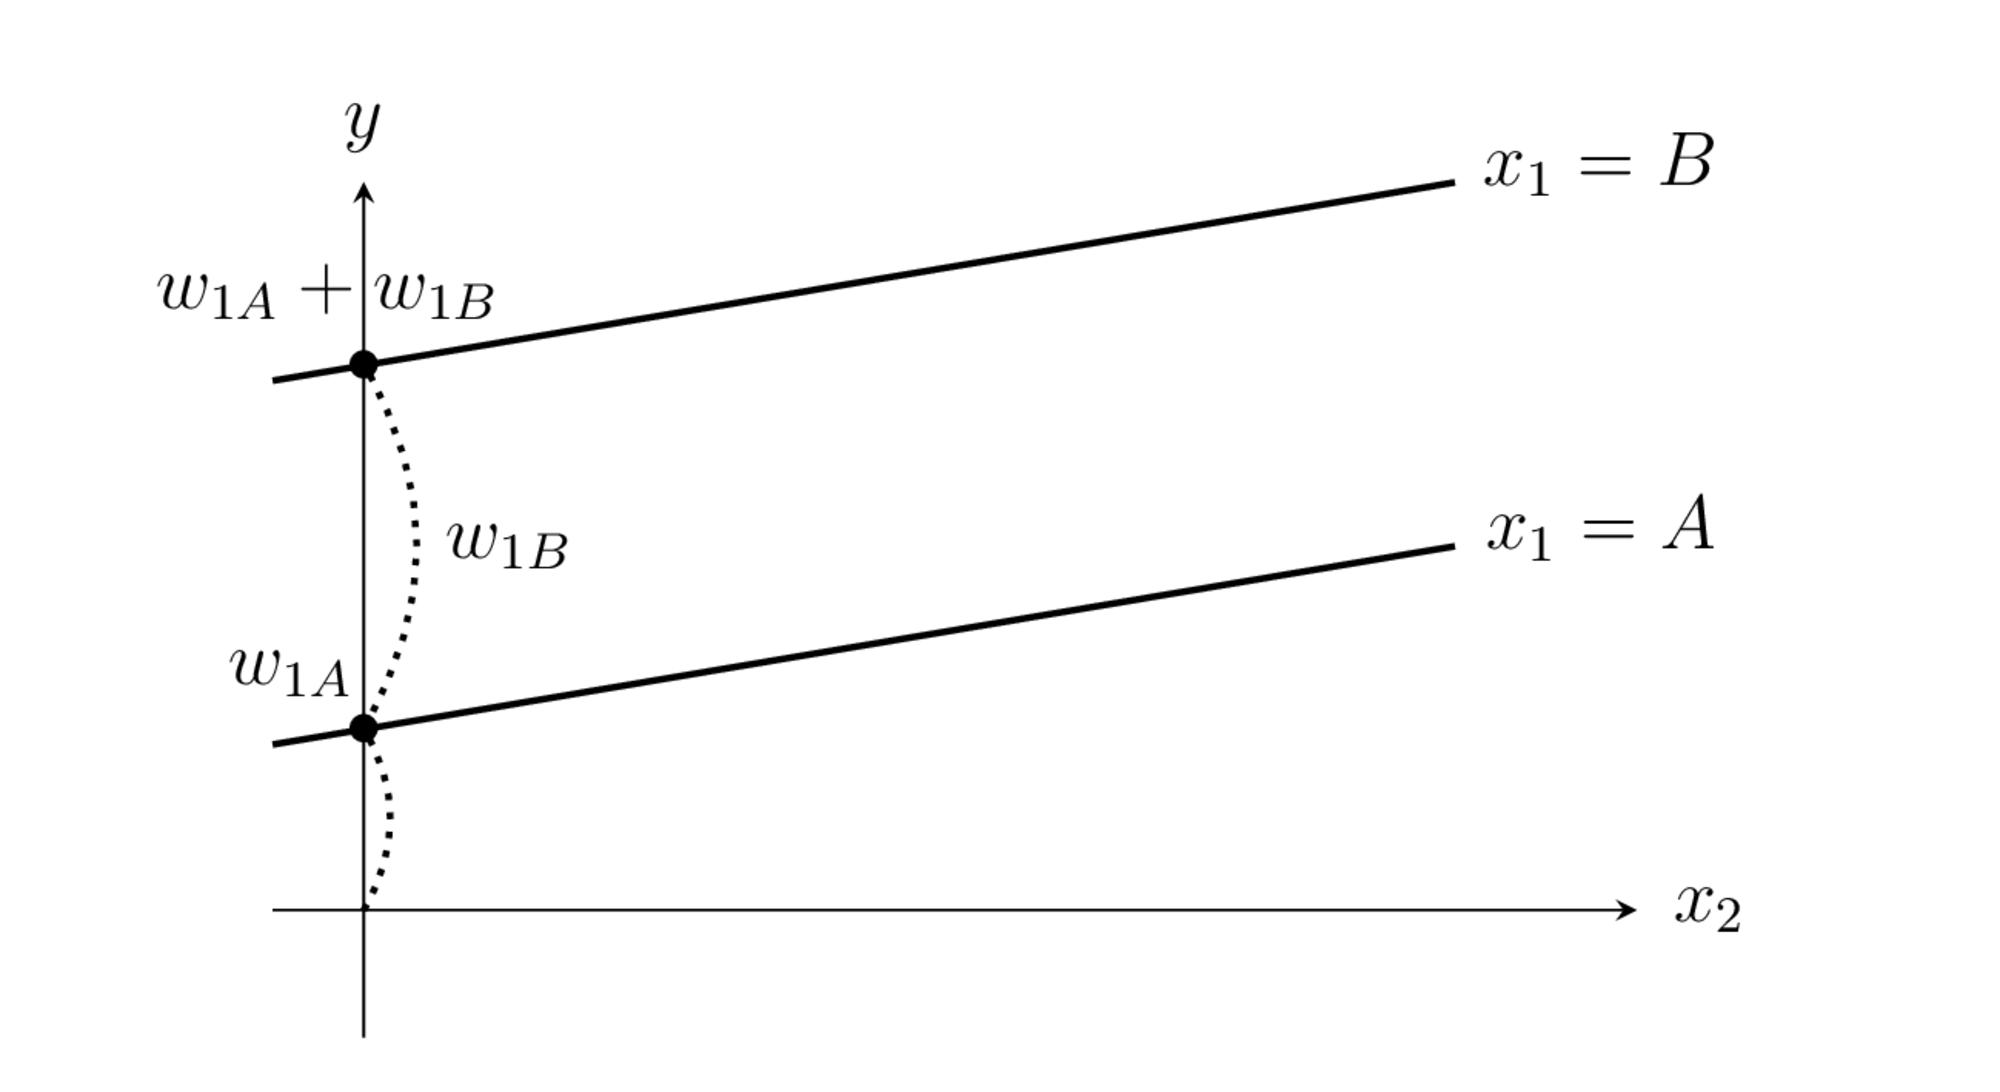

In [3]:
%%tikz -p kotex,pgfplots -l arrows.meta,calc -s 2000,1200 -f png

\coordinate (leftbottom) at (1,0);
\coordinate (righttop) at (12,6);
\fill[white,use as bounding box] (leftbottom) rectangle (righttop);
\draw[help lines, white] (leftbottom) grid (righttop);
\tikzset{
    >=stealth,font={\ttfamily\large}
}

\node (origin) at (3,1) {};
\draw[->] (3,0.3)--(3,5);
\node at (3,5.3) {$y$};
\draw[->] (2.5,1)--(10,1);
\node at (10.4,1) {$x_2$};
\draw[line width=1pt] (2.5,1.91)--(9,3);
\node at (9.8,3.1) {$x_1=A$};
\node(w1A) at (3,2) {};
\draw[fill] (w1A) circle (2pt);
\node at (2.6,2.3) {$w_{1A}$};
\draw[line width=1pt] (2.5,3.91)--(9,5);
\node at (9.8,5.1) {$x_1=B$};
\node(w1B) at (3,4) {};
\draw[fill] (w1B) circle (2pt);
\node at (2.8,4.4) {$w_{1A} + w_{1B}$};
\draw[dotted, line width=1pt] (origin.center) edge[bend right] (w1A.center);
\draw[dotted, line width=1pt] (w1A.center) edge[bend right] (w1B.center);
\node at (3.8,3) {$w_{1B}$};

그림 : 축소랭크 방식 더미변수 가중치의 의미

#### 예제

다음 데이터는 1920년부터 1939년 사이의 노팅엄(Nottingham)지역 월 평균 기온이다. 이 데이터에서 독립변수는 월(monath)이며 범주값으로 처리한다. value로 표기된 값이 종속변수인 해당 월의 평균 기온이다. 분석의 목적은 독립변수인 월 값을 이용하여 종속변수인 월 평균 기온을 예측하는 것이다. 우선 다음 코드를 사용하여 데이터 전처리를 한다.

In [4]:
import datetime
from calendar import isleap

def convert_partial_year(number):
    "연 단위 숫자에서 날짜를 계산하는 코드"
    year = int(number)
    d = datetime.timedelta(days=(number - year) * (365 + isleap(year)))
    day_one = datetime.datetime(year, 1, 1)
    date = d + day_one
    return date

df_nottem = sm.datasets.get_rdataset("nottem").data
df_nottem["date0"] = df_nottem[["time"]].applymap(convert_partial_year)
df_nottem["date"] = pd.DatetimeIndex(df_nottem["date0"]).round('60min') + datetime.timedelta(seconds=3600*24)
df_nottem["month"] = df_nottem["date"].dt.strftime("%m").astype('category')
del df_nottem["date0"], df_nottem["date"]
df_nottem.tail()

,time,value,month
235,1939.583333,61.8,08
236,1939.666667,58.2,09
237,1939.750000,46.7,10
238,1939.833333,46.6,11
239,1939.916667,37.8,12


월과 기온의 관계를 박스플롯으로 시각화하면 다음과 같다.

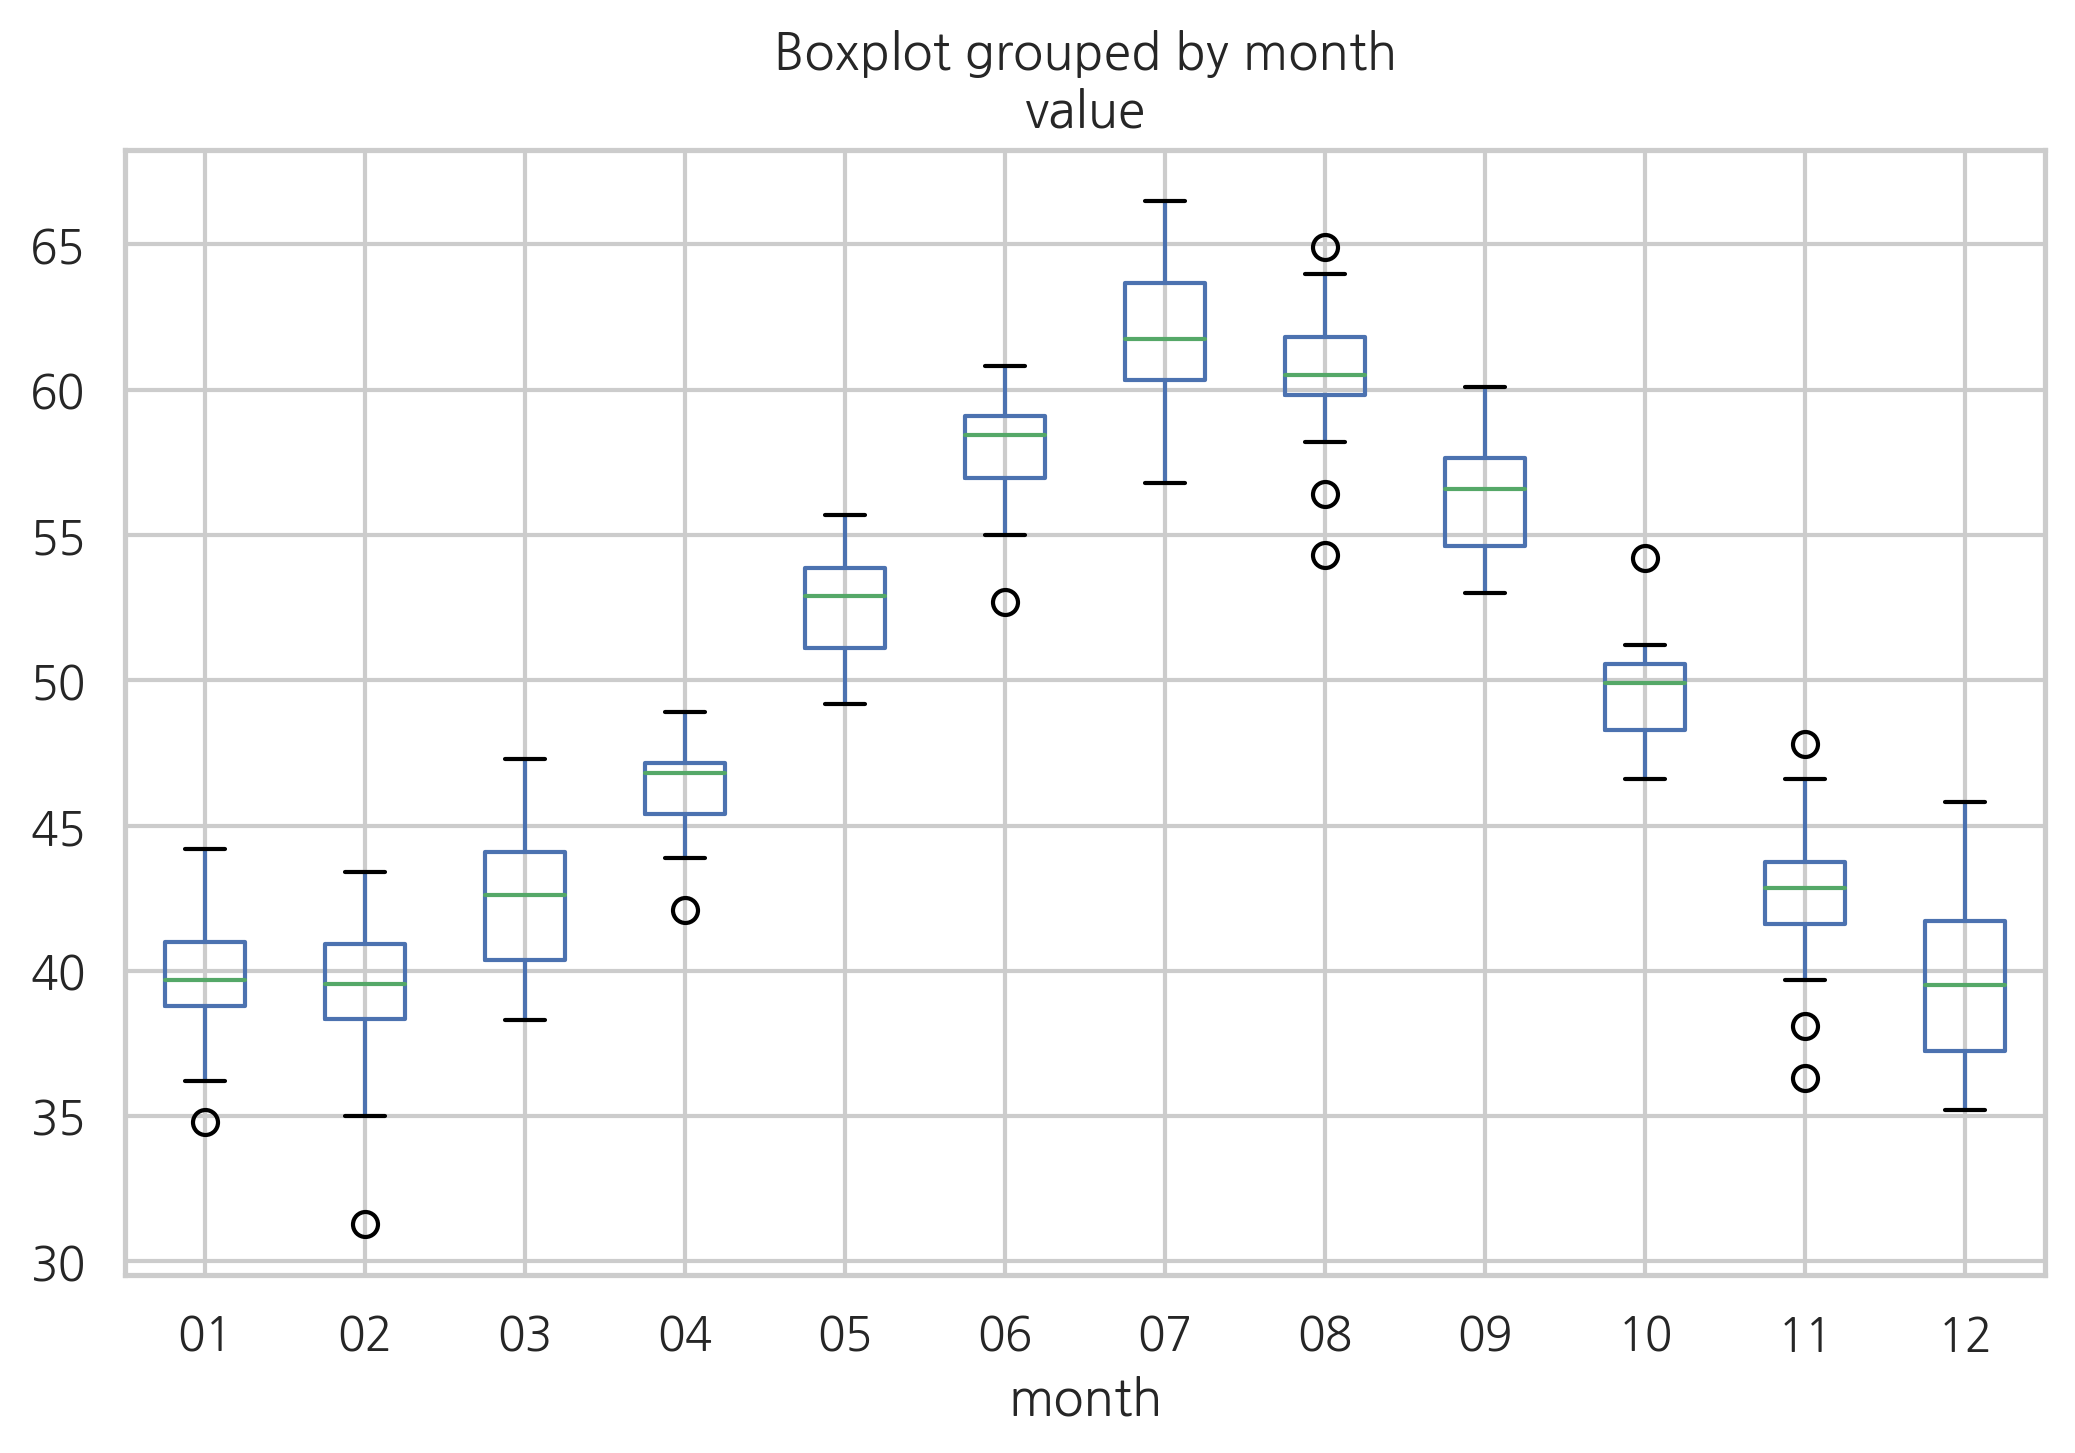

In [5]:
df_nottem.boxplot("value", "month")
plt.show()

회귀분석 모형은 다음과 같다. $x$는 월을 나타내는 독립변수, $\hat{y}$은 월 평균기온을 나타내는 종속변수다.

$$
\hat{y} \sim x
$$

$x$를 풀랭크 방식으로 더미변수화하면 다음과 같은 모형이 된다. 이 식에서 $d_i$는 $i$월을 지시하는 더미변수다.

$$
\hat{y} \sim w_1 d_1 + w_2 d_2 + w_3 d_3 + \cdots + w_{12} d_{12}
$$

더미변수의 값을 대입하면 다음과 같다.

$$
\begin{aligned}
x=1 & \; \rightarrow \; d = (1,0,0,0,\cdots,0) \; \rightarrow \; \hat{y} = w_1 \\ 
x=2 & \; \rightarrow \; d = (0,1,0,0,\cdots,0) \; \rightarrow \; \hat{y} = w_2 \\ 
x=3 & \; \rightarrow \; d = (0,0,1,0,\cdots,0) \; \rightarrow \; \hat{y} = w_3 \\ 
    & \vdots \\
x=12 & \; \rightarrow \; d = (0,0,0,0,\cdots,1) \; \rightarrow \; \hat{y} = w_{12} \\ 
\end{aligned}
$$

따라서 $w_i$는 $i$월의 기온의 표본평균값으로 계산된다.

statsmodels 패키지의 `OLS` 클래스를 사용하면 다음과 같이 회귀분석을 할 수 있다. 월 데이터가 숫자이므로 연속값으로 인식하지 않도록 `C()` 연산자를 사용하였다.

In [6]:
model = sm.OLS.from_formula("value ~ C(month) + 0", df_nottem)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Wed, 30 Oct 2019   Prob (F-statistic):          2.96e-125
Time:                        19:54:19   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[01]    39.6950      0.518     76.691   

1월을 기준월로 하는 축소랭크 방식을 사용하면 더미변수는 다음과 같다.

$$
\begin{aligned}
x=1 & \; \rightarrow \; d = (1,0,0,0,\cdots,0) \; \rightarrow \; \hat{y} = w_1 \\ 
x=2 & \; \rightarrow \; d = (1,1,0,0,\cdots,0) \; \rightarrow \; \hat{y} = w_1 + w_2 \\ 
x=3 & \; \rightarrow \; d = (1,0,1,0,\cdots,0) \; \rightarrow \; \hat{y} = w_1 + w_3  \\ 
    & \vdots \\
x=12 & \; \rightarrow \; d = (1,0,0,0,\cdots,1) \\ 
\end{aligned}
$$

포뮬러 문자열에서 `+0`을 제외하면 축소랭크 방식을 사용한다. 이 때는 1월의 평균 기온을 기준으로 각 월의 평균 기온이 1월보다 얼마나 더 높은지를 나타내는 값이 회귀모형의 계수가 된다.

In [7]:
model = sm.OLS.from_formula("value ~ C(month)", df_nottem)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Wed, 30 Oct 2019   Prob (F-statistic):          2.96e-125
Time:                        19:54:19   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         39.6950      0.518     76.

### 보스턴 집값 데이터의 범주형 변수

보스턴 집값 데이터는 `CHAS`라는 범주형 변수가 있고 이 변수는 0과 1 두 개의 값을 가진다. 

만약 보스턴 집값 데이터에서 상수값 가중치를 가지는 모형을 만들면 축소 랭크 방식으로 더미변수 변환되어 있는 것과 같다. 즉 다음과 같은 두 개의 모형을 각각 회귀분석하는 경우라고 볼 수 있다. 

* `CHAS` = 1 인 경우,
$$ y = (w_0 + w_{\text{CHAS}}) + w_{\text{CRIM}} \text{CRIM} + w_{\text{ZN}} \text{ZN} + \cdots $$

* `CHAS` = 0 인 경우,
$$ y = w_0 + w_{\text{CRIM}} \text{CRIM} + w_{\text{ZN}} \text{ZN} + \cdots $$


In [8]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df_boston = pd.concat([dfX, dfy], axis=1)

model1 = sm.OLS.from_formula("MEDV ~ " + "+".join(boston.feature_names), data=df_boston)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 30 Oct 2019   Prob (F-statistic):          6.72e-135
Time:                        19:54:19   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

반대로 보스턴 집값 데이터에서 상수값 가중치를 가지지 않는 모형을 만들면 풀 랭크 방식으로 더미변수 변환되어 있는 것과 같다. 즉 다음과 같은 두 개의 모형을 각각 회귀분석하는 경우라고 볼 수 있다. 

* `CHAS` = 1 인 경우,
$$ y = w_{\text{CHAS=0}}) + w_{\text{CRIM}} \text{CRIM} + w_{\text{ZN}} \text{ZN} + \cdots $$

* `CHAS` = 0 인 경우,
$$ y = w_{\text{CHAS=1}}) \text{CRIM} + w_{\text{ZN}} \text{ZN} + \cdots $$


In [9]:
feature_names = list(boston.feature_names)
feature_names.remove("CHAS") 
feature_names = [name for name in feature_names] + ["C(CHAS)"]
model2 = sm.OLS.from_formula("MEDV ~ 0 + " + "+".join(feature_names), data=df_boston)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 30 Oct 2019   Prob (F-statistic):          6.72e-135
Time:                        19:54:19   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(CHAS)[0.0]    36.4595      5.103      7.144   

### 두 개 이상의 범주형 변수가 있는 경우

두 개 이상의 범주형 변수가 있는 경우에는 축소형 방식을 사용한다. 이 때 주의할 점은 모든 범주형 범수의 가중치는 기준값 상수항에 더해지는 상수항으로 취급된다. 예들 들어  $x_1$은 A, B 의 두가지 값을 가지고 $x_2$은 X, Y의 두가지 값을 가지고 값을 가지는 경우 상수항과 각 더미변수의 가중치의 의미는 다음과 같아진다.

$$
\begin{aligned}
\hat{y} &= w_0    && + && w_1 x_1                 && + && w_2 x_2                 &+ \cdots  + w_D x_D \\
        &         &&   && \hspace{5pt} \downarrow &&   && \hspace{5pt} \downarrow & \\
\hat{y} &= w_{AX} && + && w_{1B} d_{1B}           && + && w_{2Y} d_{2Y}           &+ \cdots  + w_D x_D \\
\end{aligned}
$$



* $w_{AX} $: 기준값 $x_1=A, x_2=X$인 경우의 상수항
* $w_{1,B}$: 기준값 $x_1=B, x_2=X$인 경우에 추가되는 상수항
* $w_{1,Y}$: 기준값 $x_1=A, x_2=Y$인 경우에 추가되는 상수항
* $w_{1,B} + w_{1,Y}$: 기준값 $x_1=B, x_2=Y$인 경우에 추가되는 상수항


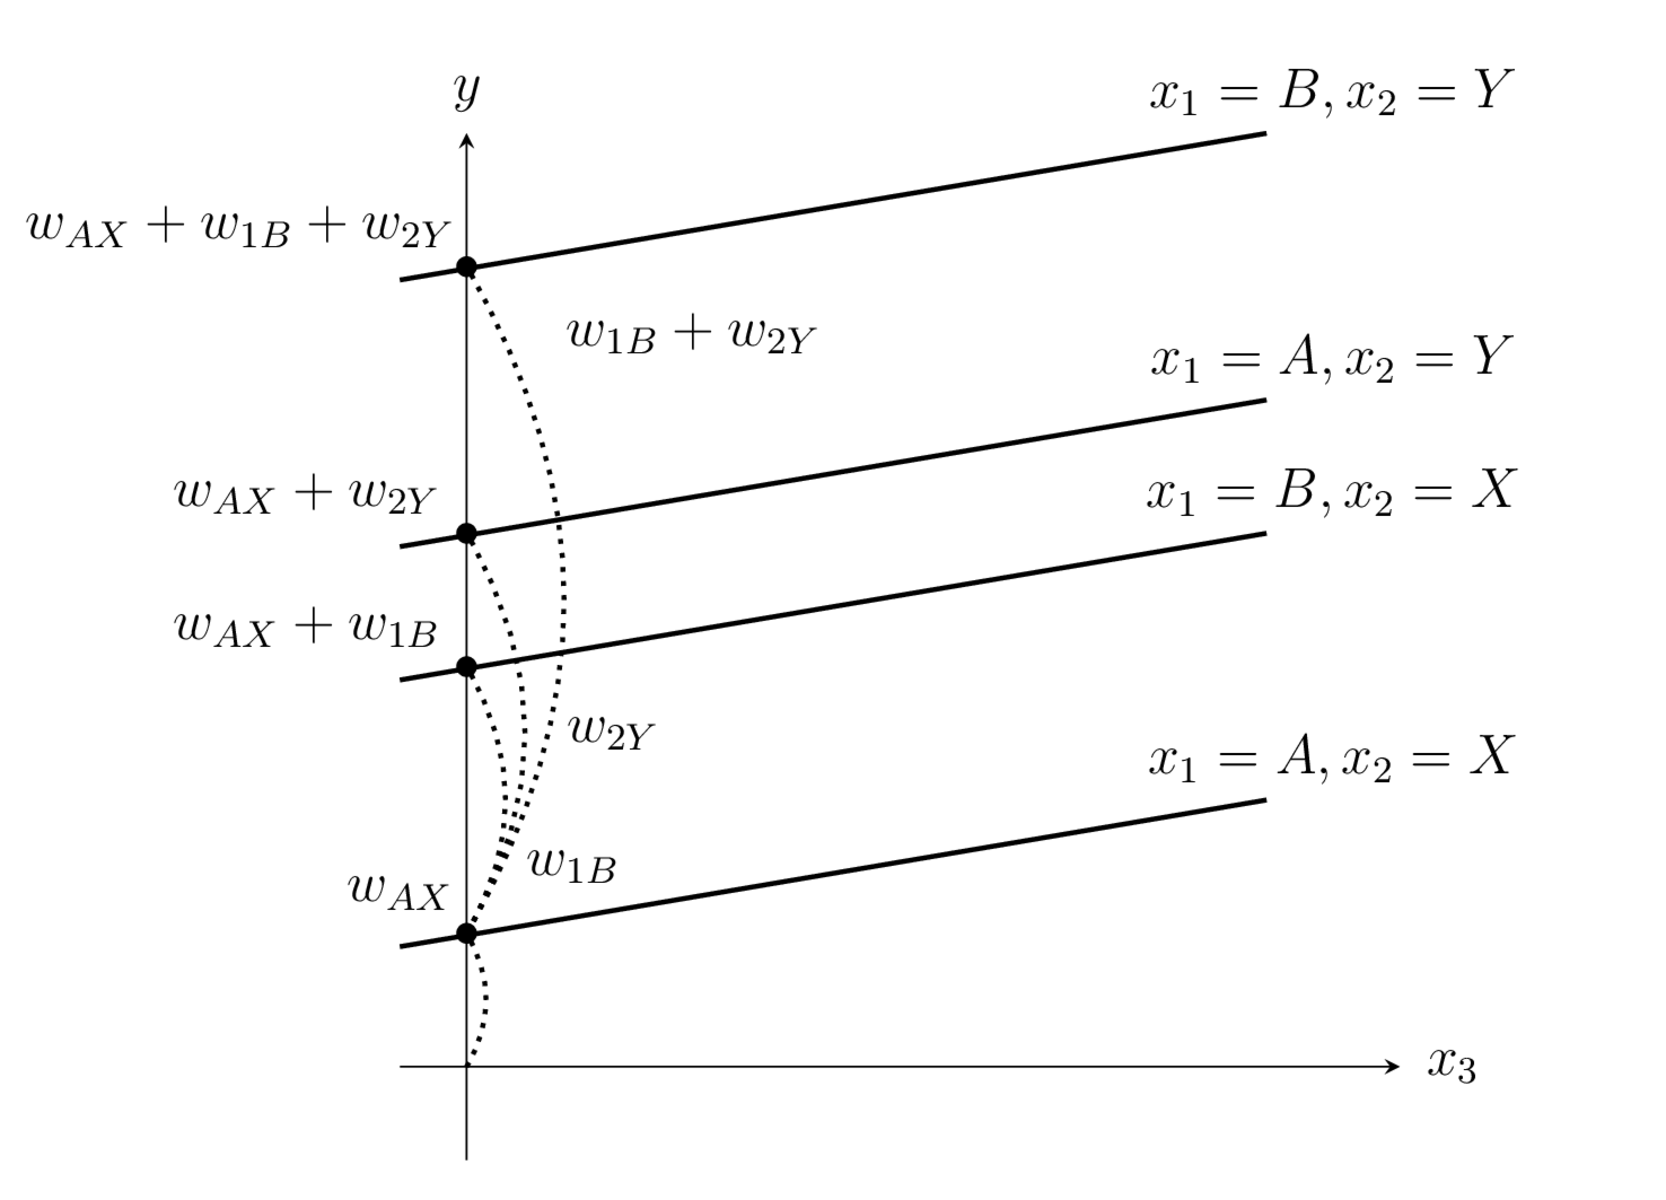

In [10]:
%%tikz -p kotex,pgfplots -l arrows.meta,calc -s 2000,1200 -f png

\coordinate (leftbottom) at (-0.5,0);
\coordinate (righttop) at (12,9);
\fill[white,use as bounding box] (leftbottom) rectangle (righttop);
\draw[help lines, white] (leftbottom) grid (righttop);
\tikzset{
    >=stealth,font={\ttfamily\large}
}

\node (origin) at (3,1) {};

\draw[->] (3,0.3)--(3,8);
\node at (3,8.3) {$y$};
\draw[->] (2.5,1)--(10,1);
\node at (10.4,1) {$x_3$};

\draw[line width=1pt] (2.5,1.9)--(9,3);
\node at (9.5,3.3) {$x_1=A,x_2=X$};
\node(wAX) at (3,2) {};
\draw[fill] (wAX) circle (2pt);
\node at (2.5,2.3) {$w_{AX}$};

\draw[line width=1pt] (2.5,3.9)--(9,5);
\node at (9.5,5.3) {$x_1=B,x_2=X$};
\node(w1B) at (3,4) {};
\draw[fill] (w1B) circle (2pt);
\node at (1.8,4.3) {$w_{AX} + w_{1B}$};

\draw[line width=1pt] (2.5,4.9)--(9,6);
\node at (9.5,6.3) {$x_1=A,x_2=Y$};
\node(w2Y) at (3,5) {};
\draw[fill] (w2Y) circle (2pt);
\node at (1.8,5.3) {$w_{AX} + w_{2Y}$};

\draw[line width=1pt] (2.5,6.9)--(9,8);
\node at (9.5,8.3) {$x_1=B,x_2=Y$};
\node(wBY) at (3,7) {};
\draw[fill] (wBY) circle (2pt);
\node at (1.3,7.3) {$w_{AX} + w_{1B} + w_{2Y}$};

\draw[dotted, line width=1pt] (origin.center) edge[bend right] (wAX.center);
\draw[dotted, line width=1pt] (wAX.center) edge[bend right] (w1B.center);
\draw[dotted, line width=1pt] (wAX.center) edge[bend right] (w2Y.center);
\draw[dotted, line width=1pt] (wAX.center) edge[bend right] (wBY.center);

\node at (3.8,2.5) {$w_{1B}$};
\node at (4.1,3.5) {$w_{2Y}$};
\node at (4.7,6.5) {$w_{1B}+w_{2Y}$};

### 범주형 독립변수와 실수 독립변수의 상호작용

만약 범주형 변수의 값이 달라질 때 상수항만 달라지는 것이 아니라 다른 독립변수들이 미치는 영향도 달라지는 모형을 원한다면 상호작용(interaction)을 쓰면 된다. 예를 들어 범주형 독립변수 $x_1$과 실수 독립변수 $x_2$를 가지는 회귀모형에서 연속값 독립변수 $x_2$가 미치는 영향 즉 가중치가 범주형 독립변수 $x_1$의 값에 따라 달라진다면 범주형 독립변수를 더미변수 $d_1$으로 인코딩하고 연속값 독립변수 $x_2$는 $d_1$과의 상호작용 항 `d_1:x_2` 를 추가하여 사용한다.


이 때 모형은 다음과 같아진다.

$$ 
\begin{aligned}
\hat{y} 
&= w_0 + w_{1} x_1 \cdot w_2 x_2 \\
&= w_0 + (w_{1A}d_A + w_{1B}d_B) \cdot (w_2x_2) \\
&= w_0 + w_{2A} d_A x_2 + w_{2B} d_B  x_2 \\
\end{aligned}
$$

$x_1=A$일 때는 $d_A=1,d_B=0$에서

$$ \hat{y} = w_0 + w_{2A}x_2 $$

$x_1=B$일 때는  $d_A=0,d_B=1$에서

$$ \hat{y} = w_0 + w_{2B}x_2 $$

이므로 $x_1$ 범주값에 따라 $x_2$의 기울기가 달라지는 모형이 된다.

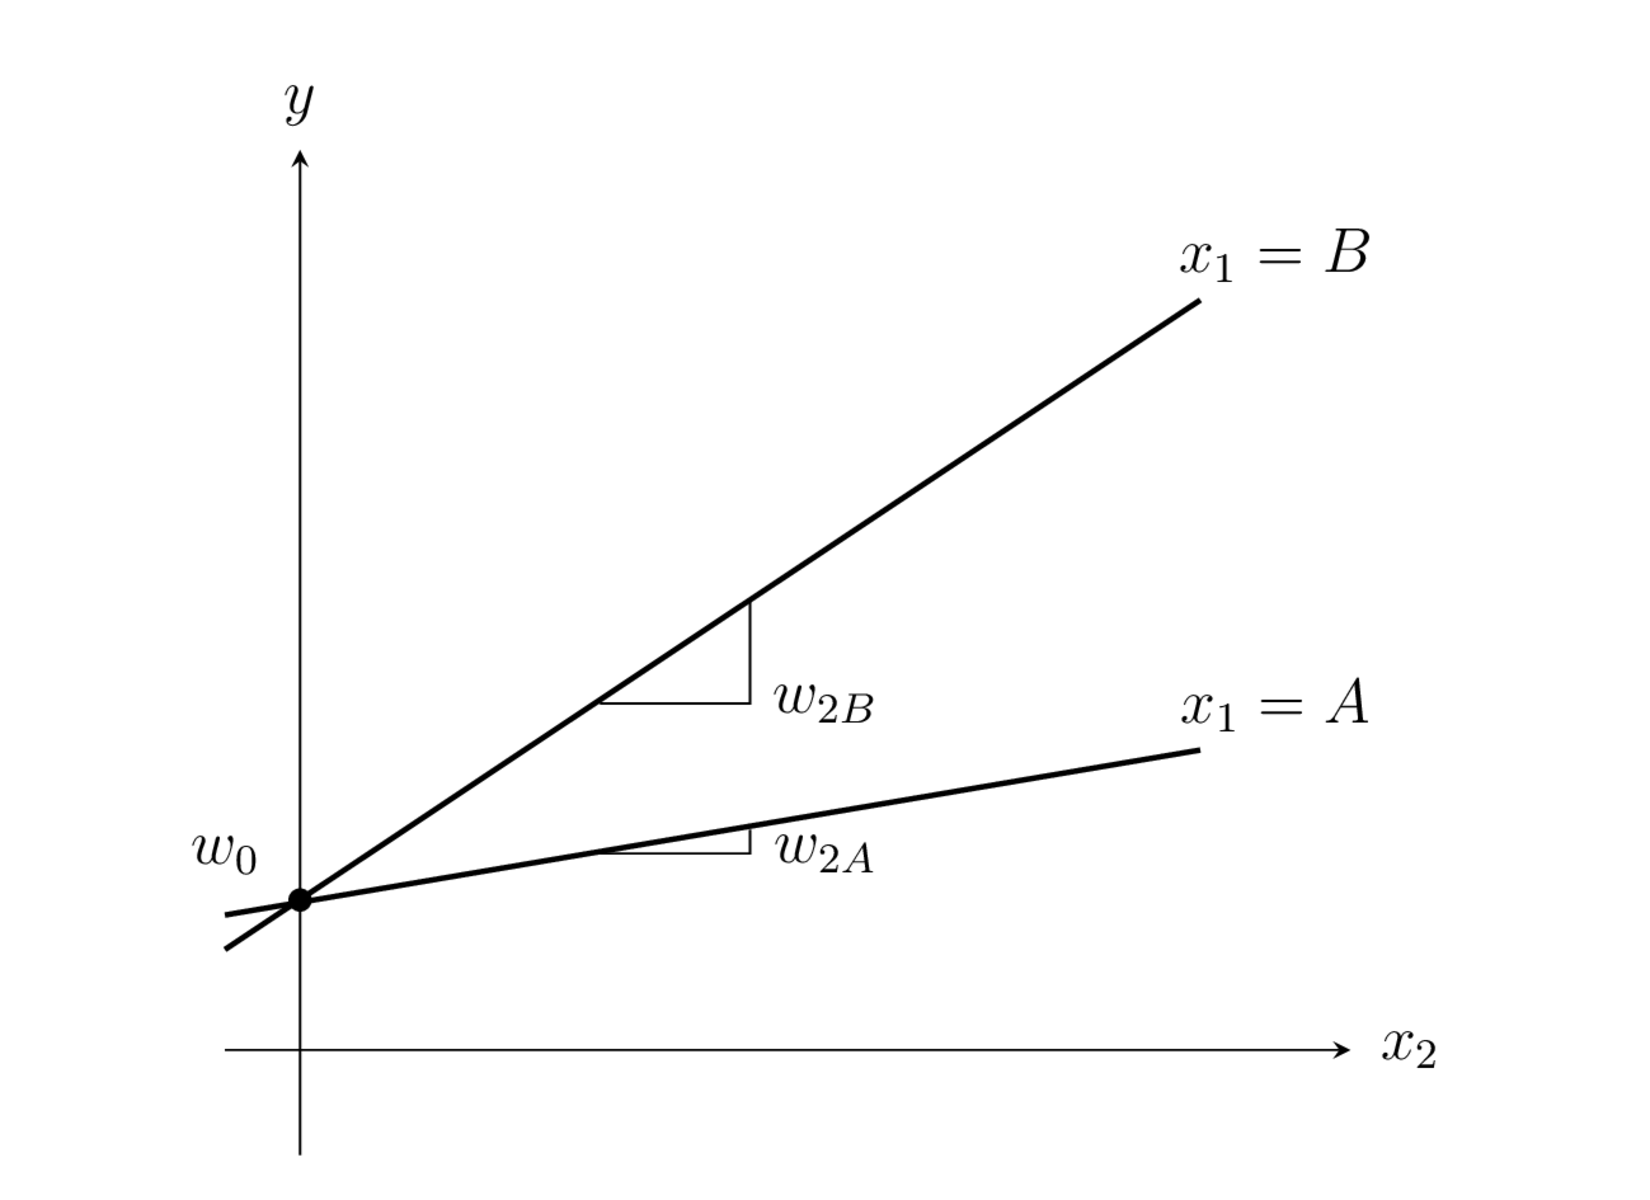

In [11]:
%%tikz -p kotex,pgfplots -l arrows.meta,calc -s 2000,1200 -f png

\coordinate (leftbottom) at (1,0);
\coordinate (righttop) at (12,8);
\fill[white,use as bounding box] (leftbottom) rectangle (righttop);
\draw[help lines, white] (leftbottom) grid (righttop);
\tikzset{
    >=stealth,font={\ttfamily\large}
}

\node (origin) at (3,1) {};

\draw[->] (3,0.3)--(3,7);
\node at (3,7.3) {$y$};
\draw[->] (2.5,1)--(10,1);
\node at (10.4,1) {$x_2$};

\draw[line width=1pt] (2.5,1.9)--(9,3);
\node at (9.5,3.3) {$x_1=A$};
\node(wAX) at (3,2) {};
\draw[fill] (wAX) circle (2pt);
\node at (2.5,2.3) {$w_{0}$};

\draw[line width=1pt] (2.5,1.67)--(9,6);
\node at (9.5,6.3) {$x_1=B$};

\draw (5,2.31) coordinate (w2A) -- ++(1,0) -- ++(0,0.16);
\node at ($(w2A)+(1.5,0)$) {$w_{2A}$};
\draw (5,3.31) coordinate (w2B) -- ++(1,0) -- ++(0,.7);
\node at ($(w2B)+(1.5,0)$) {$w_{2B}$};

만약 범주형 독립변수도 종속변수에 영향을 미치고 범주형 독립변수와 실수 독립변수의 상호작용도 종속변수에 영향을 미친다면 모형은 다음과 같아진다.

$$ 
\begin{aligned}
\hat{y} 
&= w_{1} x_1 + w_{12} x_1 \cdot w_2 x_2 \\
&= (w_{1A}d_A + w_{1B}d_B) + (w_{1A}d_A + w_{1B}d_B)\cdot (w_2x_2) \\
&= (w_{1A}d_A + w_{1B}d_B) + (w_{2A}d_A + w_{2B}d_B)x_2 \\
&= (w_{1A} + w_{2A} x_2)d_A + (w_{2B} + w_{2B}x_2)d_B \\
\end{aligned}
$$

$x_1=A$일 때는 $d_A=1,d_B=0$에서

$$ \hat{y} =w_{1A} + w_{2A}x_2 $$

$x_1=B$일 때는  $d_A=0,d_B=1$에서

$$ \hat{y} = w_{1B} + w_{2B}x_2 $$

이므로 $x_1$ 범주값에 따라 상수항과 $x_2$의 기울기가 모두 달라지는 모형이 된다.

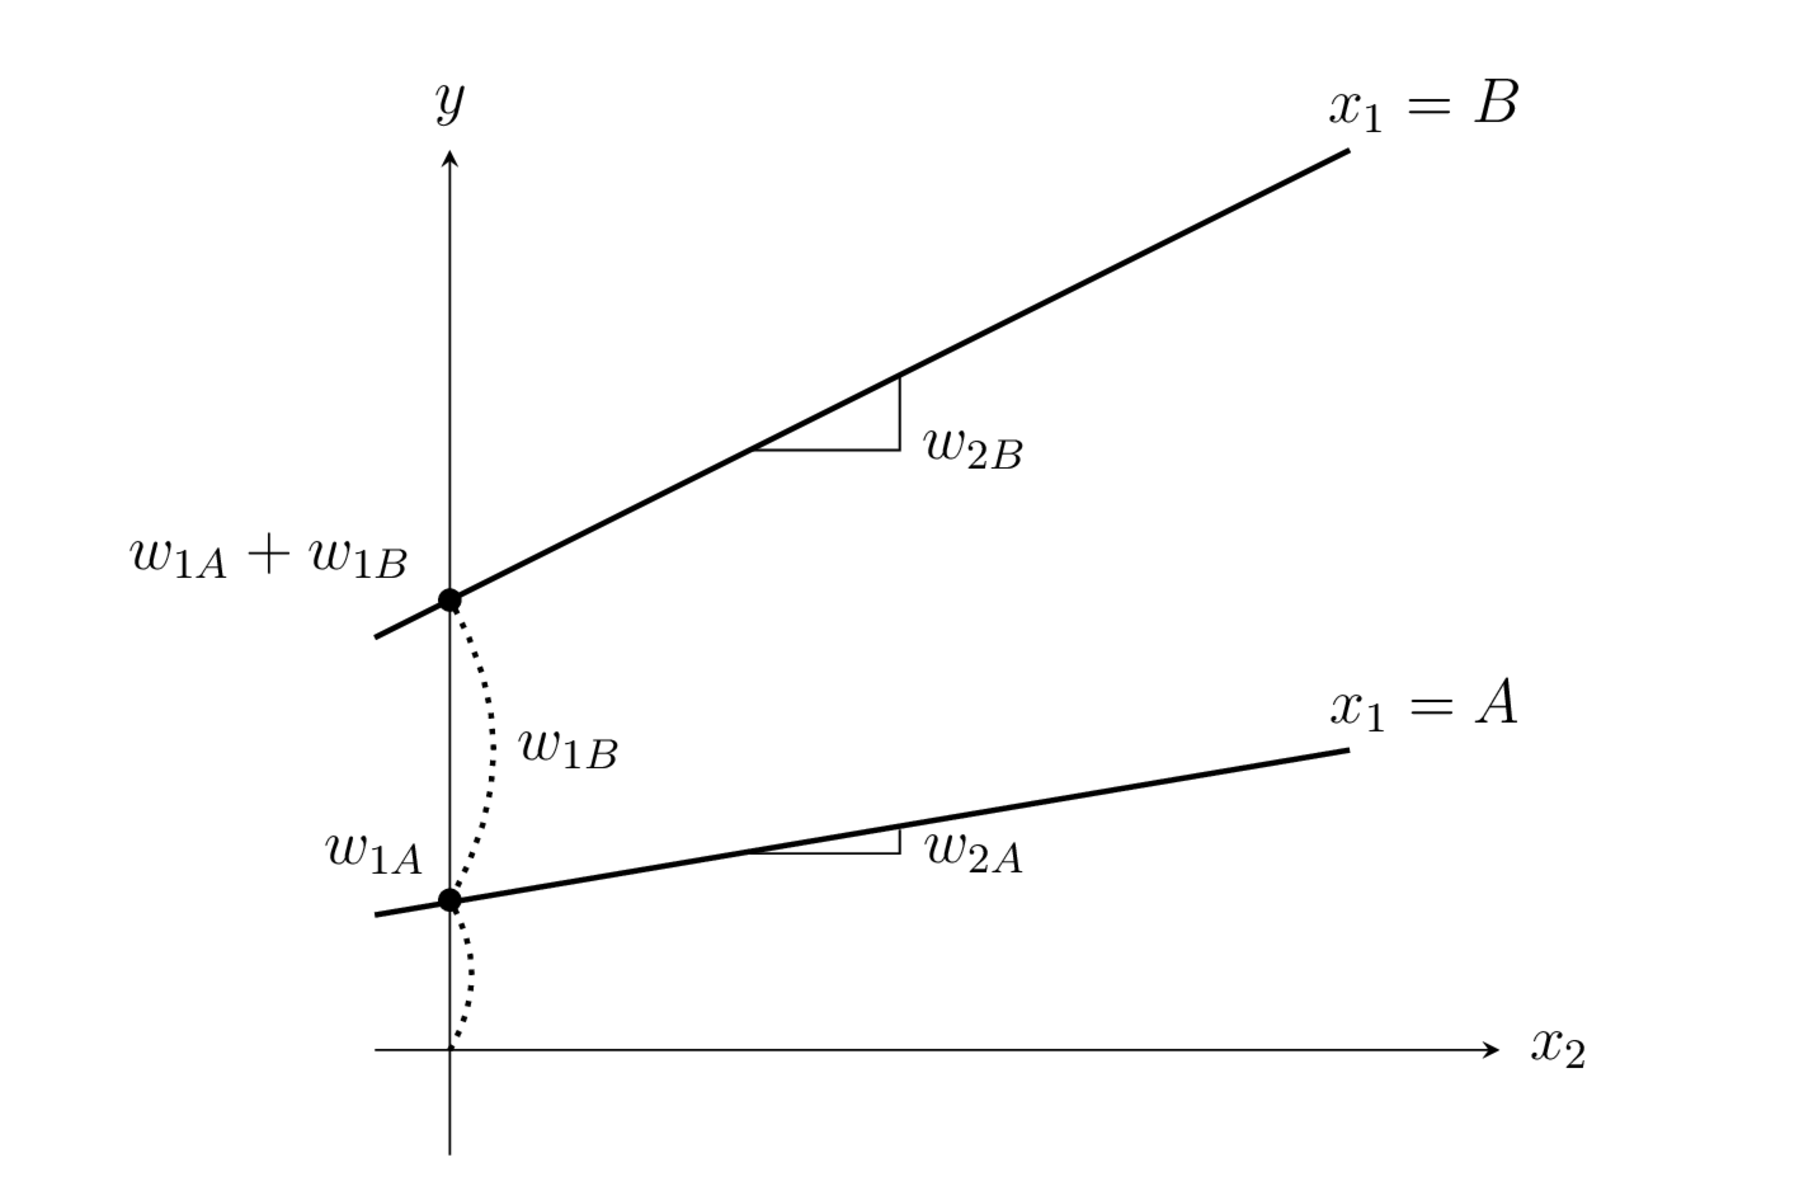

In [12]:
%%tikz -p kotex,pgfplots -l arrows.meta,calc -s 2000,1200 -f png

\coordinate (leftbottom) at (0,0);
\coordinate (righttop) at (12,8);
\fill[white,use as bounding box] (leftbottom) rectangle (righttop);
\draw[help lines, white] (leftbottom) grid (righttop);
\tikzset{
    >=stealth,font={\ttfamily\large}
}

\node (origin) at (3,1) {};

\draw[->] (3,0.3)--(3,7);
\node at (3,7.3) {$y$};
\draw[->] (2.5,1)--(10,1);
\node at (10.4,1) {$x_2$};

\draw[line width=1pt] (2.5,1.9)--(9,3);
\node at (9.5,3.3) {$x_1=A$};
\node(wAX) at (3,2) {};
\draw[fill] (wAX) circle (2pt);
\node at (2.5,2.3) {$w_{1A}$};

\draw[line width=1pt] (2.5,3.75)--(9,7);
\node at (9.5,7.3) {$x_1=B$};
\node(w1B) at (3,4) {};
\draw[fill] (w1B) circle (2pt);
\node at (1.8,4.3) {$w_{1A} + w_{1B}$};

\draw[dotted, line width=1pt] (origin.center) edge[bend right] (wAX.center);
\draw[dotted, line width=1pt] (wAX.center) edge[bend right] (w1B.center);

\node at (3.8,3) {$w_{1B}$};


\draw (5,2.31) coordinate (w2A) -- ++(1,0) -- ++(0,0.16);
\node at ($(w2A)+(1.5,0)$) {$w_{2A}$};
\draw (5,5) coordinate (w2B) -- ++(1,0) -- ++(0,.5);
\node at ($(w2B)+(1.5,0)$) {$w_{2B}$};